# GRIP - The Spark Foundation : Data Science & Business Analytics Intern

# Code Written By :- Rahul Kumar Dutta

# Task 1: Prediction Using Supervised ML
    
Problem Statement :- Predict the percentage of an student based on the no.of Study hours.    

# Importing Needed Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Data

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

print('Data successfully Imported')

Data successfully Imported


In [20]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
df.describe()  # Describing the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.shape

(25, 2)

In [10]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
df.isnull().sum()  # Checking any null values present in columns or not.

Hours     0
Scores    0
dtype: int64

# Visualization 

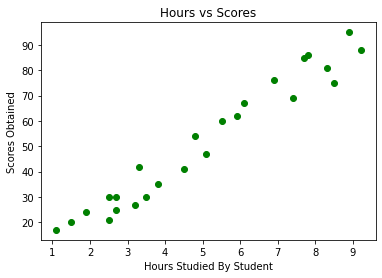

In [17]:

plt.scatter(df.Hours,df.Scores,color='green')
plt.xlabel("Hours Studied By Student")
plt.ylabel("Scores Obtained")
plt.title("Hours vs Scores")
plt.show()

# Splitting The Data into Train and Test Dataset

In [29]:
split=np.random.rand(len(df))< 0.5   # Considering 50% of data should present in train and rest in test set
split

array([False, False,  True, False, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True])

In [30]:
train=df[split]
train

,Hours,Scores
2,3.2,27
6,9.2,88
7,5.5,60
8,8.3,81
11,5.9,62
14,1.1,17
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69


In [31]:
test=df[~split]
test

,Hours,Scores
0,2.5,21
1,5.1,47
3,8.5,75
4,3.5,30
5,1.5,20
9,2.7,25
10,7.7,85
12,4.5,41
13,3.3,42
15,8.9,95


# Train Data Distribution

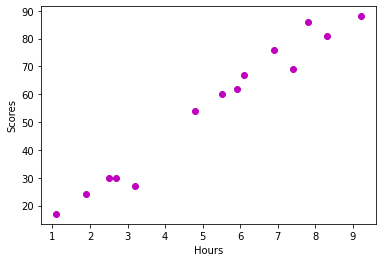

In [32]:
plt.scatter(train.Hours,train.Scores,color='m')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# Test Data Distribution

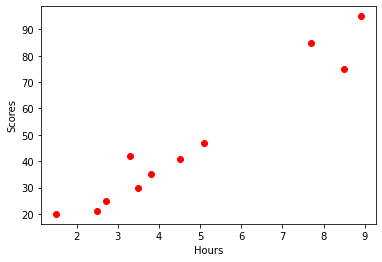

In [61]:
plt.scatter(test.Hours,test.Scores,color='r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# Modelling

In [33]:
from sklearn import linear_model
regr=linear_model.LinearRegression()

In [34]:
train_x=np.asanyarray(train[['Hours']])   # Converting the input to an ndarray
train_y=np.asanyarray(train[['Scores']])

In [35]:
train_x

array([[3.2],
       [9.2],
       [5.5],
       [8.3],
       [5.9],
       [1.1],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [6.9],
       [7.8]])

In [36]:
train_y

array([[27],
       [88],
       [60],
       [81],
       [62],
       [17],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [76],
       [86]], dtype=int64)

In [37]:
regr.fit(train_x,train_y)

LinearRegression()

In [38]:
print('Coefficients is : ',regr.coef_)
print('Intercept is : ',regr.intercept_)

Coefficients is :  [[9.45486388]]
Intercept is :  [5.56846268]


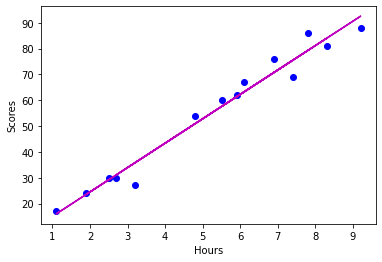

In [44]:
plt.scatter(train.Hours,train.Scores,color='b')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0] ,'m-')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Above Visualization verified that Linear Regression algorithm should be used here.

# Predicting and Finding Accuracy Scores.

In [45]:
from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['Hours']])
test_y=np.asanyarray(test[['Scores']])

test_y_=regr.predict(test_x)

In [47]:
test_y_

array([[29.20562238],
       [53.78826847],
       [85.93480567],
       [38.66048626],
       [19.7507585 ],
       [31.09659516],
       [78.37091456],
       [48.11535015],
       [36.76951349],
       [89.71675122],
       [41.49694543]])

In [48]:
print("Mean absolute error : %.2f " %np.mean(np.absolute(test_y_ - test_y)))

Mean absolute error : 6.52 


In [49]:
print(" Accuracy score is : %.2f" %r2_score(test_y,test_y_))

 Accuracy score is : 0.92


Assume a student studies for 9.25 hrs/day. What is the expected score he/she can get?

In [60]:
Hours=np.array([[9.25]])

predict=regr.predict(Hours)

print("No.of Hours = {}".format(Hours[0][0]))
print(" Predicted Scores ={}".format(predict[0][0]))

No.of Hours = 9.25
 Predicted Scores =93.02595357709606
